# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('CarDekho.csv')
df

,Column1,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


# Understanging Data

In [3]:
df.head()

,Column1,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.tail()

,Column1,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [5]:
df.shape

(15411, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Column1            15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


# CHECKING MISSING VALUES

In [7]:
df.isna().sum()

Column1              0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

# Data Preprocessing

In [8]:
#Drop the irrelevant columns
df.drop(columns = ['Column1'], axis = 1, inplace= True)

#Verify the new structure
print("Irrelevant columns dropped successfully!")
print("Remaining columns:", df.columns.tolist())

Irrelevant columns dropped successfully!
Remaining columns: ['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [9]:
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [10]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [11]:
numerical_features = df.select_dtypes(exclude= 'object').columns
categorical_features = df.select_dtypes(include= 'object').columns

In [12]:
numerical_features

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

In [13]:
categorical_features

Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')

# Descriptive Statistics

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_age,15411.0,6.036338,3.013291,0.0,4.0,6.00,8.0,29.00
km_driven,15411.0,55616.480631,51618.548422,100.0,30000.0,50000.00,70000.0,3800000.00
mileage,15411.0,19.701151,4.171265,4.0,17.0,19.67,22.7,33.54
engine,15411.0,1486.057751,521.106696,793.0,1197.0,1248.00,1582.0,6592.00
max_power,15411.0,100.588254,42.972979,38.4,74.0,88.50,117.3,626.00
seats,15411.0,5.325482,0.807628,0.0,5.0,5.00,5.0,9.00
selling_price,15411.0,774971.116410,894128.363263,40000.0,385000.0,556000.00,825000.0,39500000.00


# FEATURE SELECTION

In [15]:
df_model = df.copy()
df_model.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


# FEATURE ENGINEERING

In [16]:
df_model ['current_year'] = 2025
df_model['year'] = df_model['current_year'] - df_model['vehicle_age']
df_model["power_to_engine_ratio"] = df["max_power"] / df_model["engine"]

In [17]:
df_model.drop(['vehicle_age', 'brand', 'model', 'max_power', 'engine'], axis=1, inplace=True)

In [18]:
#One hot Encoding  Categorical Features
df_model=pd.get_dummies(df_model,dtype=int)

In [19]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Columns: 138 entries, km_driven to transmission_type_Manual
dtypes: float64(2), int32(131), int64(5)
memory usage: 8.5 MB


In [20]:
# Independent and Dependent Variables
x = df_model.drop(columns=['selling_price'])
y = df_model['selling_price']

# TRAIN TEST SPLIT

In [21]:
# Split the Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 42)

In [22]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# MODEL SELECTION

In [26]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_square = r2_score(y_test, y_pred)

print("Random Forest Performance")
print(f'MAE : {mae:2f}')
print(f'RMSE : {rmse:2f}')
print(f'R_Square : {r_square:2f}')


Random Forest Performance
MAE : 126833.757752
RMSE : 345417.316962
R_Square : 0.841504


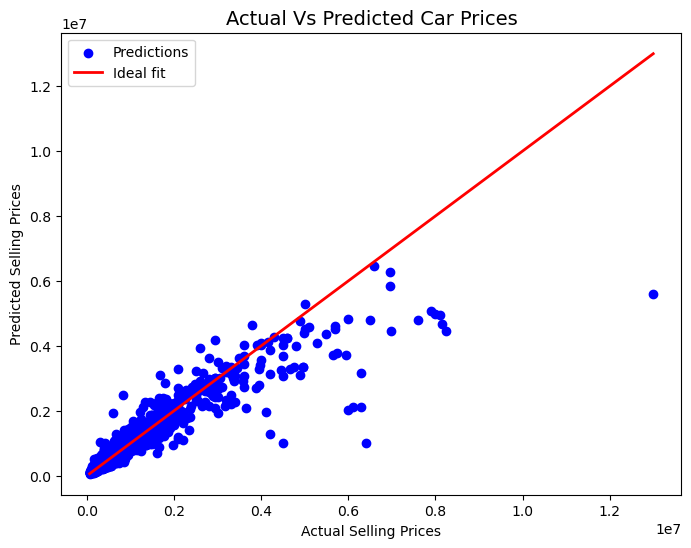

In [31]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal fit')
plt.title('Actual Vs Predicted Car Prices', fontsize=14)
plt.xlabel('Actual Selling Prices', fontsize=14)
plt.ylabel('Predicted Selling Prices', fontsize=14)
plt.legend()
plt.show()

In [39]:
import pickle

with open('rf_model.pkl', 'wb') as file:
     pickle.dump(rf_model, file)
